# Analisi minimi, massimi, media e deviazione standard

In [ ]:
import pandas as pd
import os

In [ ]:
dataset_path = os.path.join("Dataset", "dataset_giornaliero.csv")
df = pd.read_csv(dataset_path)

In [ ]:
df.head()

In [ ]:
single_phase = ["P_CabinePower_L1", "P_HeatPump", "P_CabineLight_L3"]
three_phase = ["P WS Emergency Light", "P WS Light", "P WS FanCoil", "P WS FM"]

fields_sum = ["PowerL1", "PowerL2", "PowerL3", "TotalPower"]

L1 = ["P_CabinePower_L1", "P L1 WS Emergency Light", "P L1 WS Light", "P L1 WS FanCoil", "P L1 WS FM"]
L2 = ["P_HeatPump", "P L2 WS Emergency Light", "P L2 WS Light", "P L2 WS FanCoil", "P L2 WS FM"]
L3 = ["P_CabineLight_L3", "P L3 WS Emergency Light", "P L3 WS Light", "P L3 WS FanCoil", "P L3 WS FM"]

In [ ]:
rounded_describe = df.describe().round(decimals=2)

In [ ]:
rounded_describe[fields_sum]

In [ ]:
rounded_describe[L1]

In [ ]:
rounded_describe[L2]

In [ ]:
rounded_describe[L3]

# Plot curve di carico

In [1]:
from scipy.signal import resample
import numpy as np
from datetime import datetime
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import os
import pandas as pd
import calendar

In [2]:
color1 = "#c8a2c8" # lilla
color2 = "#6495ed" # blu fiordaliso
color3 = "#93ccea" # blu fiordaliso chiaro
color4 = "#000000" # nero
color5 = "#2271b3" # blu cielo

In [3]:
SECONDS_IN_DAY = 60*60*24
SECONDS_IN_MONTH = 60*60*24*31
SECONDS_IN_YEAR = 60*60*24*31*12

In [4]:
plot_path = os.path.join("Plot", "PlotDatasetMediato")
plot_path = os.path.join(plot_path, "DistribuzioneCarichi")
dataset_path = os.path.join("Dataset", "dataset_giornaliero.csv")

In [5]:
counter = 0
def make_path(base_path, file_name):
    global counter
    counter += 1
    file_name = str(counter) + "-" + file_name  
    return os.path.join(base_path, file_name)

In [6]:
df = pd.read_csv(dataset_path)

In [7]:
def get_x_ticks_from_delta(start, end, len_x):
    delta = end - start
    delta_s = delta.total_seconds()
    delta_s += 1
    
    if delta_s <= SECONDS_IN_DAY:
        step = int(delta_s//60//60) + 1
        positions = np.linspace(0,len_x,step)
        dist = positions[1] - positions[0]
        positions = [x + int(dist//2) for x in positions]
        positions = positions[:-1]
        labels = [str(i)+":00" for i in range(0,len(positions))]
        
    elif delta_s <= SECONDS_IN_MONTH:
        step = int(delta_s//60//60//24) + 1
        positions = np.linspace(0,len_x,step)
        dist = positions[1] - positions[0]
        positions = [x + int(dist//2) for x in positions]
        positions = positions[:-1]
        labels = [str(i+1) for i in range(0,len(positions))]
        
    else:
        step = int(delta_s//60//60//24//28)
        positions = np.linspace(0,len_x,step)
        dist = positions[1] - positions[0]
        positions = [x + int(dist//2) for x in positions]
        positions = positions[:-1]
        labels = [str(i+1) for i in range(0,len(positions))]
        
    return positions, labels

In [8]:
def get_data(data, start, end, field):
    df_tmp = data[
        (data["Year"] >= start.year) & (data["Year"] <= end.year) &
        (data["Month"] >= start.month) & (data["Month"] <= end.month) &
        (data["Day"] >= start.day) & (data["Day"] <= end.day)
    ]
    return list(df_tmp[field])

### Plot singolo

In [ ]:
def plot_single_load_distribution(data, start, end, field, c1, c2, title, xlabel, ylabel, dim, plot_path):
                
    plt.figure(figsize=dim) 
    plt.grid(color=c2, linestyle="-", linewidth="0.2", axis="y")
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    yvalue = get_data(data, start, end, field)
    len_x = len(yvalue)
    xvalue = [x for x in range(0,len_x)]  
    
    #plt.axvspan(3, 6, color='red', alpha=0.5)
    
    positions, labels = get_x_ticks_from_delta(start, end, len_x)
    plt.xticks(positions, labels, rotation=45)
    
    plt.plot(xvalue, yvalue, color=c1, linewidth="1.5")
    
    file_name = "".join(title.lower()).replace(" ", "_")
    path = make_path(plot_path, file_name)
    plt.savefig(path, bbox_inches='tight', transparent=True)
    plt.show()

In [ ]:
start = datetime(2020, 1, 1, 0, 0, 0)
end = datetime(2022, 12, 31, 23, 59, 59)
title = "Curva di carico giornaliera"
xlabel = "TotalPower"
ylabel = "W"
dim = (30,10)
plot_single_load_distribution(df, start, end, "TotalPower", color5, color4, title, xlabel, ylabel, dim, plot_path)

### Plot multiplo

In [9]:
def plot_multiple_load_distribution(data, start, end, fields, c, title, ylabel, dim, plot_path):
                
    plt.figure(figsize=dim) 
    plt.grid(color=c, linestyle="-", linewidth="0.2", axis="y")
    
    plt.title(title)
    plt.ylabel(ylabel)
    
    for field in fields:
        yvalue = get_data(data, start, end, field)
        len_x = len(yvalue)
        xvalue = [x for x in range(0,len_x)]  
        plt.plot(xvalue, yvalue, linewidth="1.5", label=field)
    
    
    positions, labels = get_x_ticks_from_delta(start, end, len_x)
    plt.xticks(positions, labels, rotation=45)
    
    plt.legend()
    
    file_name = "".join(title.lower()).replace(" ", "_")
    path = make_path(plot_path, file_name)
    plt.savefig(path, bbox_inches='tight', transparent=True)
    plt.show()

In [10]:
single_phase = ["P_CabinePower_L1", "P_HeatPump", "P_CabineLight_L3"]
three_phase = ["P WS Emergency Light", "P WS Light", "P WS FanCoil", "P WS FM"]

fields_sum = ["PowerL1", "PowerL2", "PowerL3", "TotalPower"]

L1 = ["P_CabinePower_L1", "P L1 WS Emergency Light", "P L1 WS Light", "P L1 WS FanCoil", "P L1 WS FM"]
L2 = ["P_HeatPump", "P L2 WS Emergency Light", "P L2 WS Light", "P L2 WS FanCoil", "P L2 WS FM"]
L3 = ["P_CabineLight_L3", "P L3 WS Emergency Light", "P L3 WS Light", "P L3 WS FanCoil", "P L3 WS FM"]

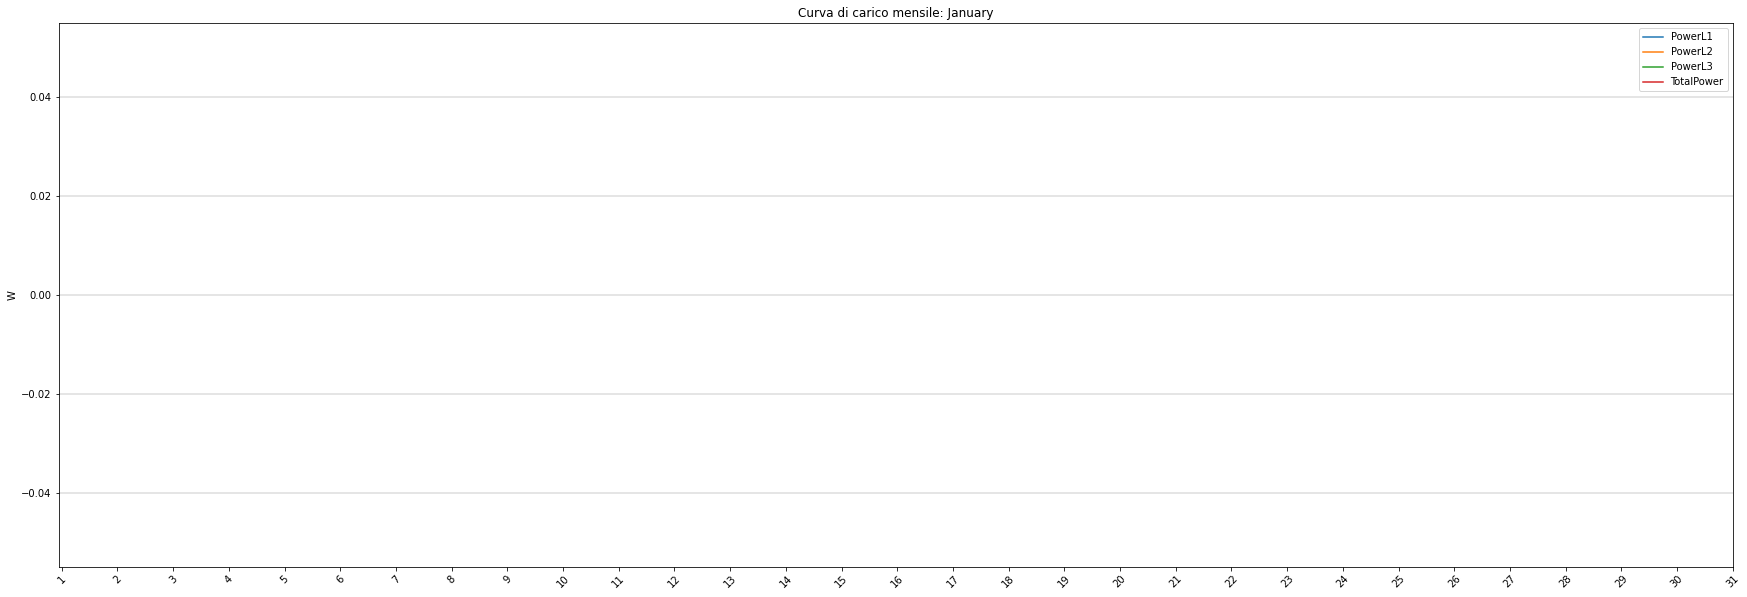

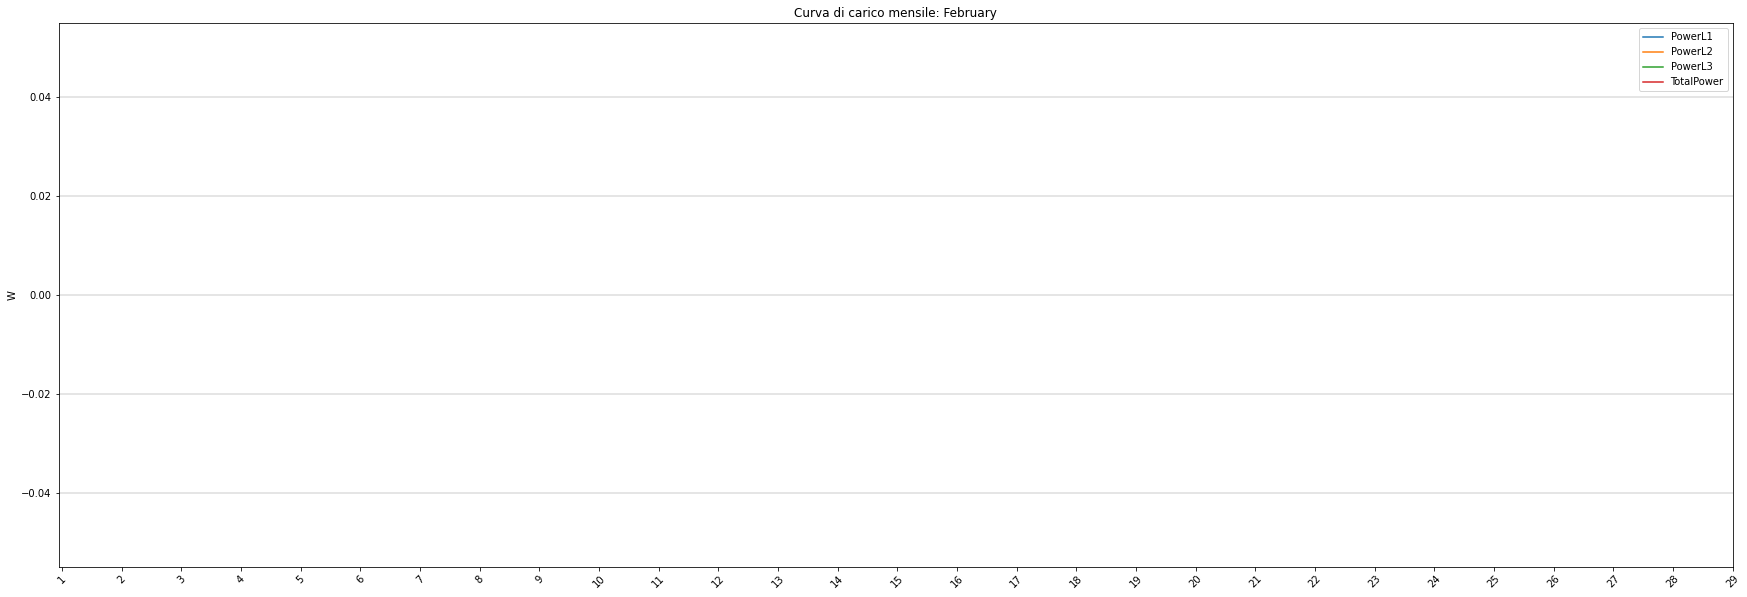

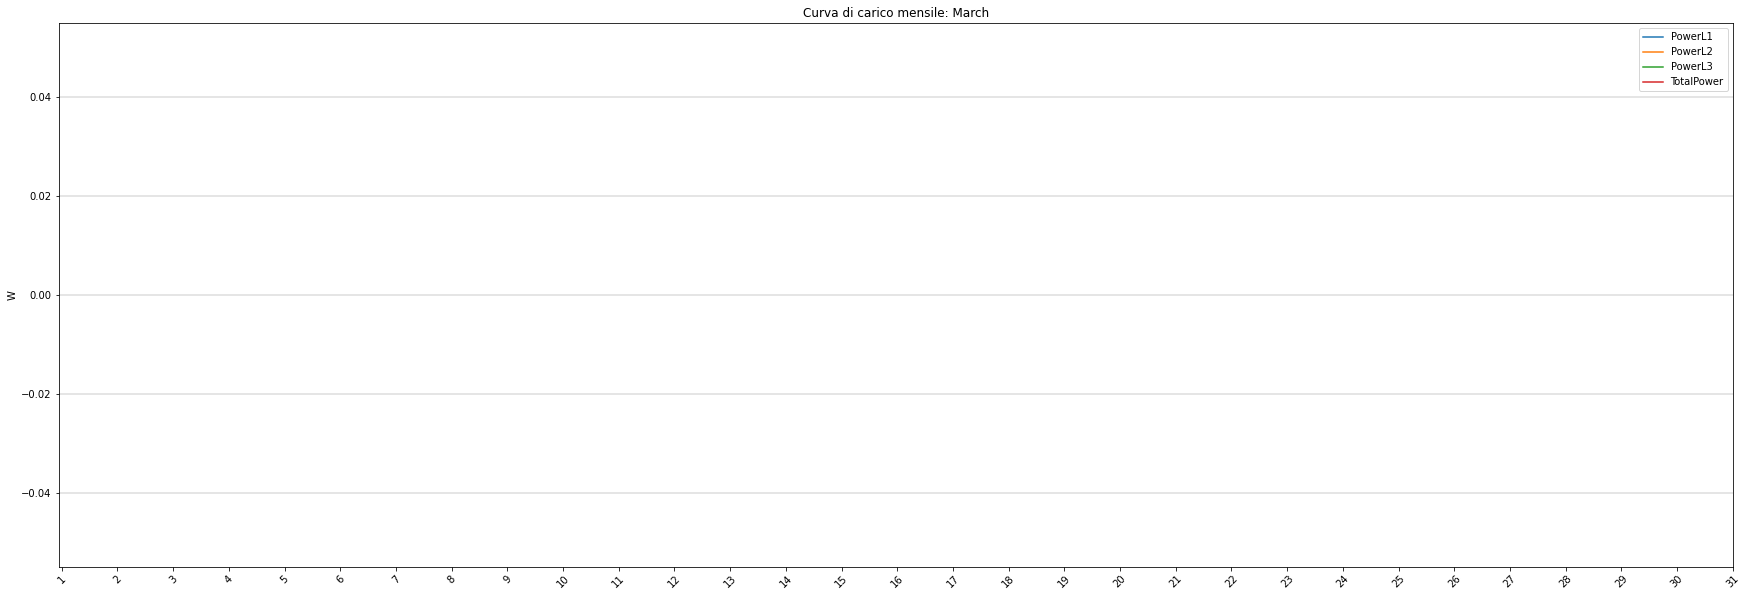

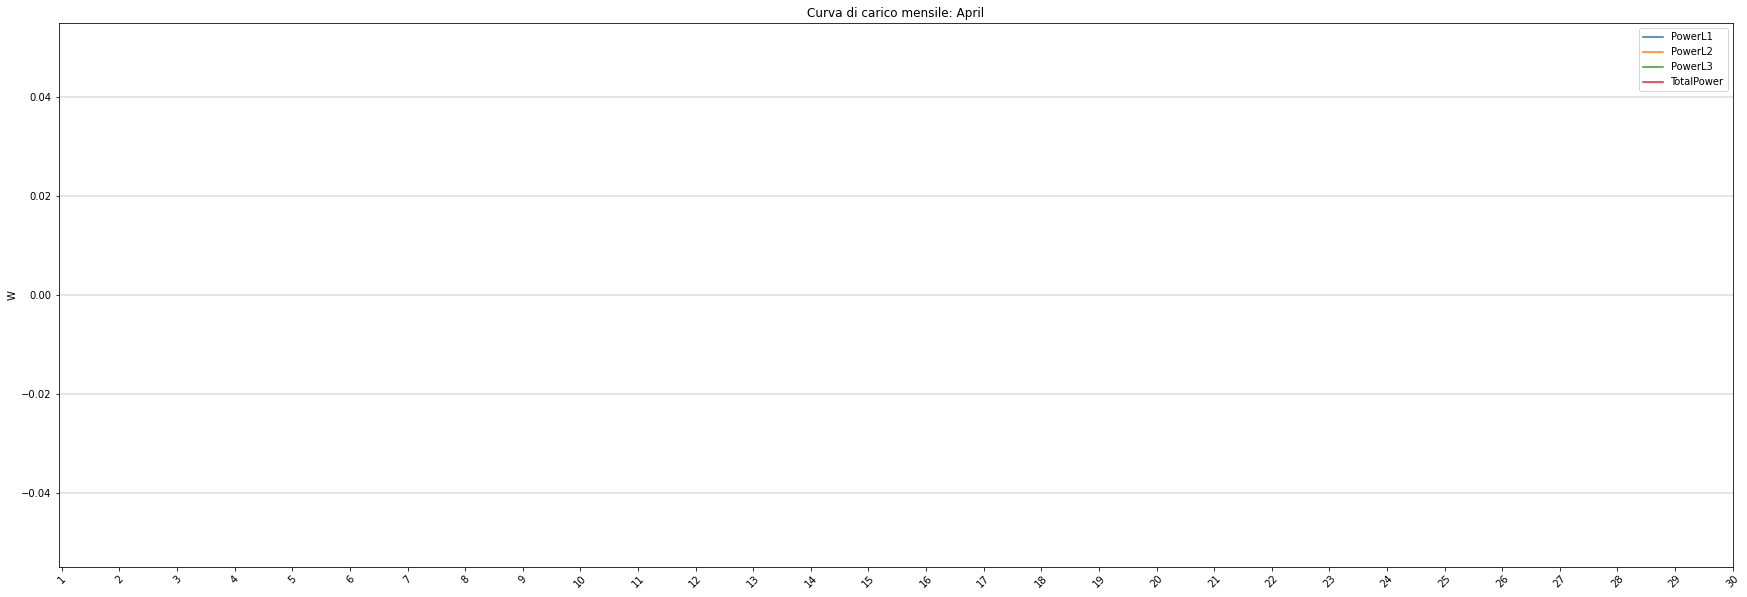

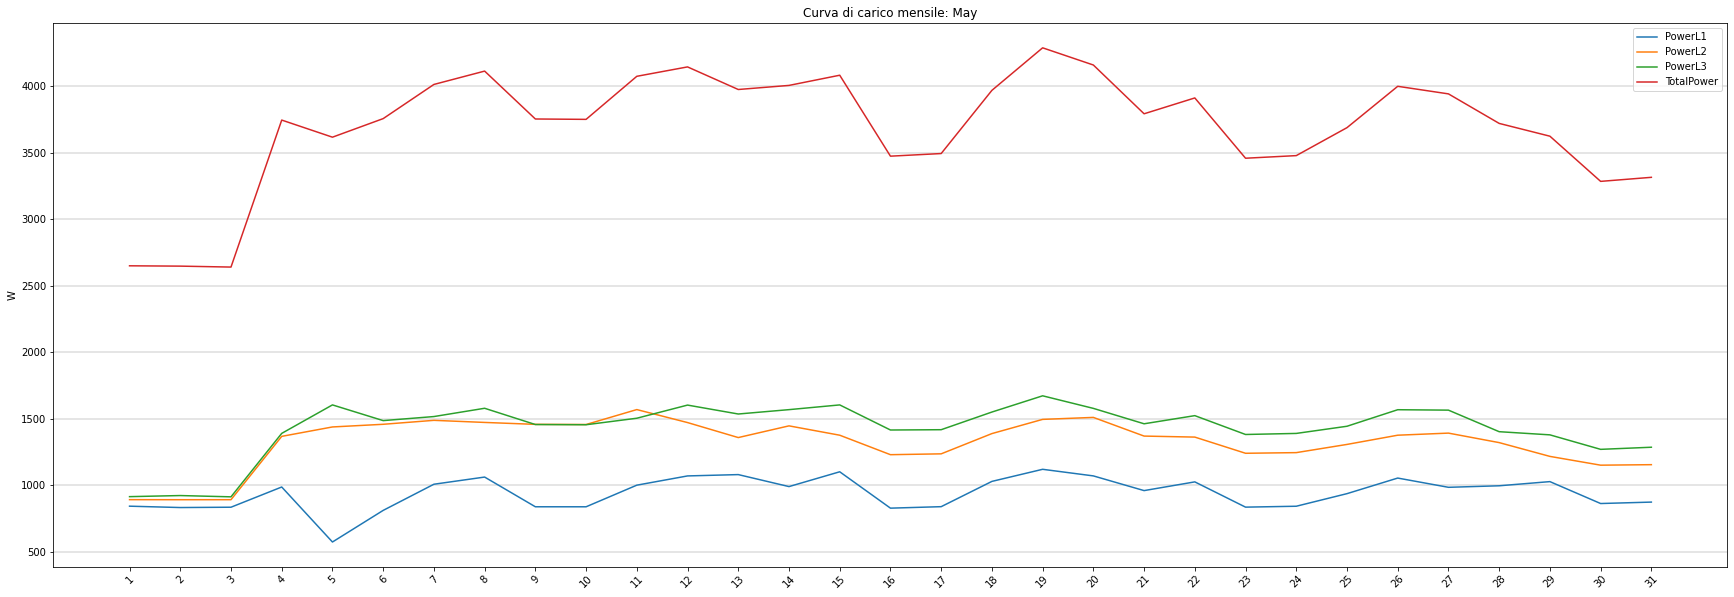

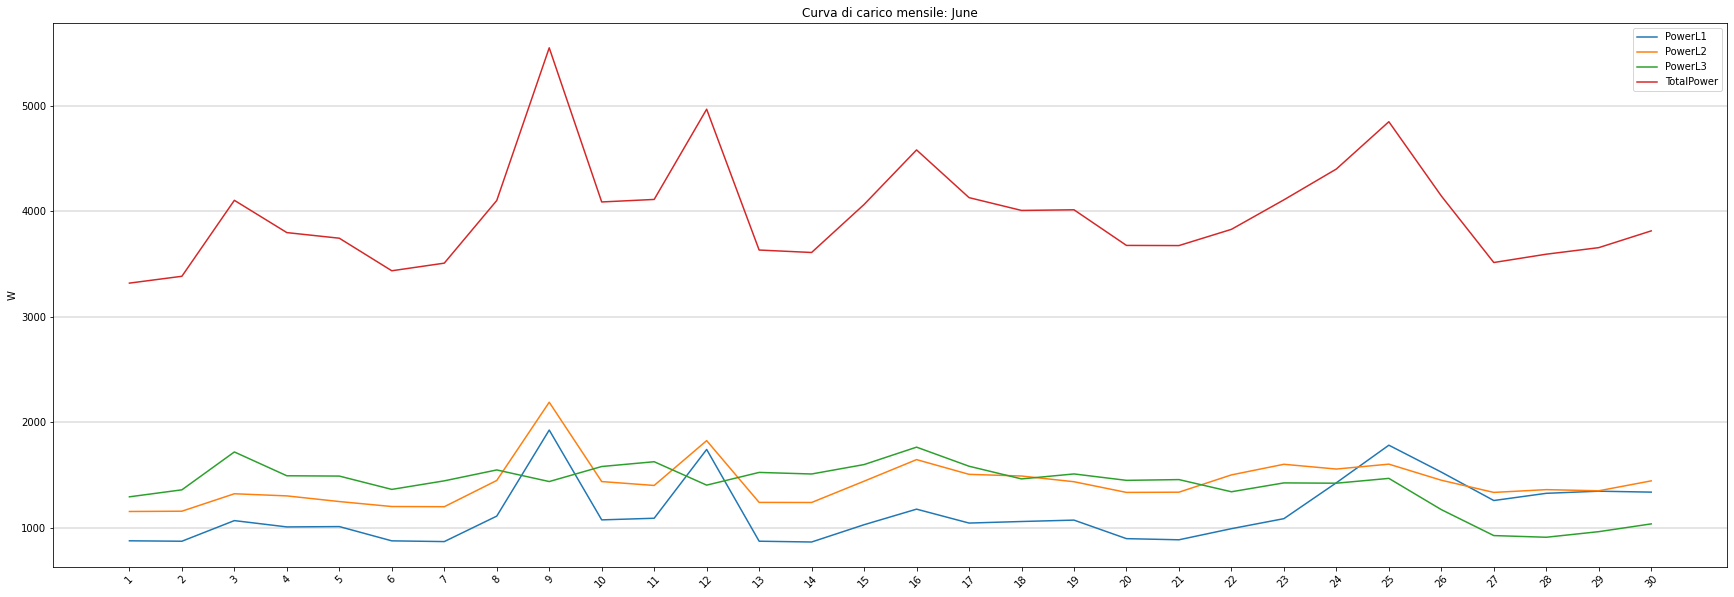

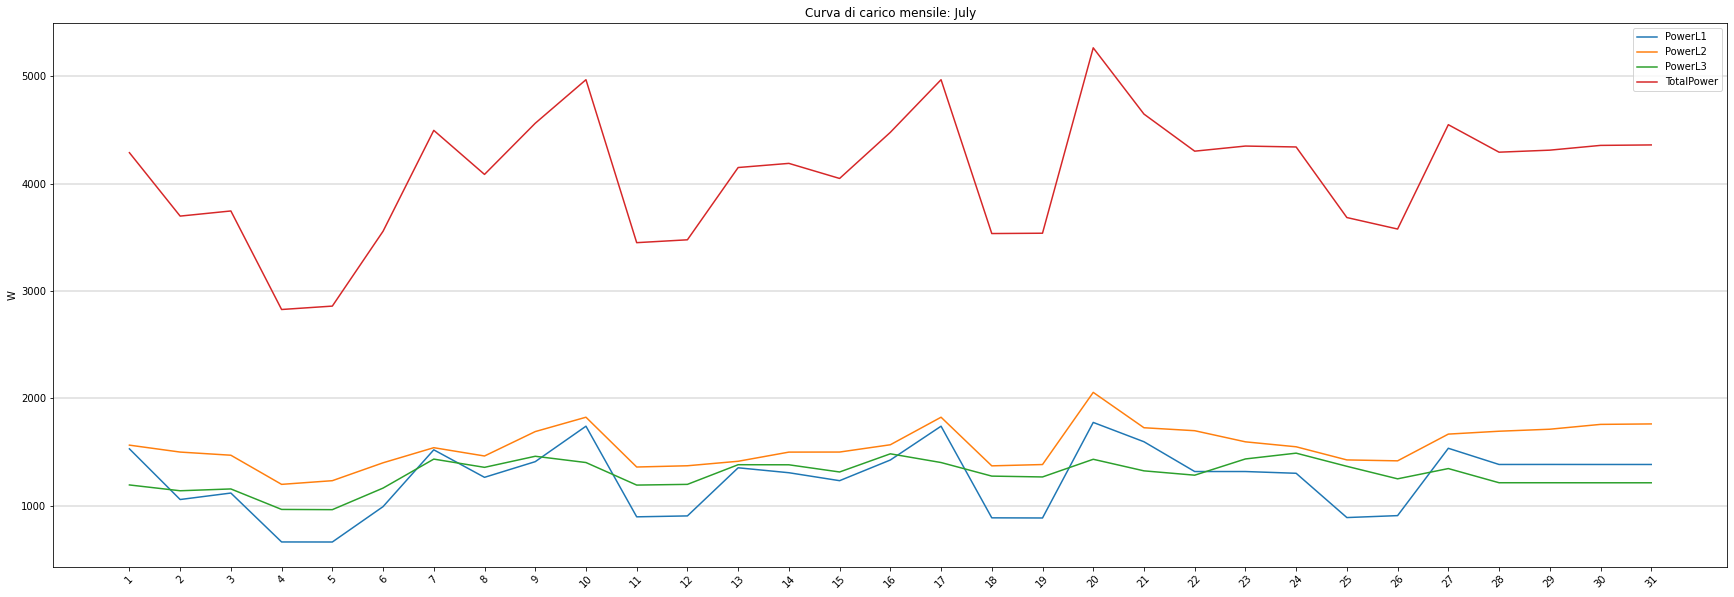

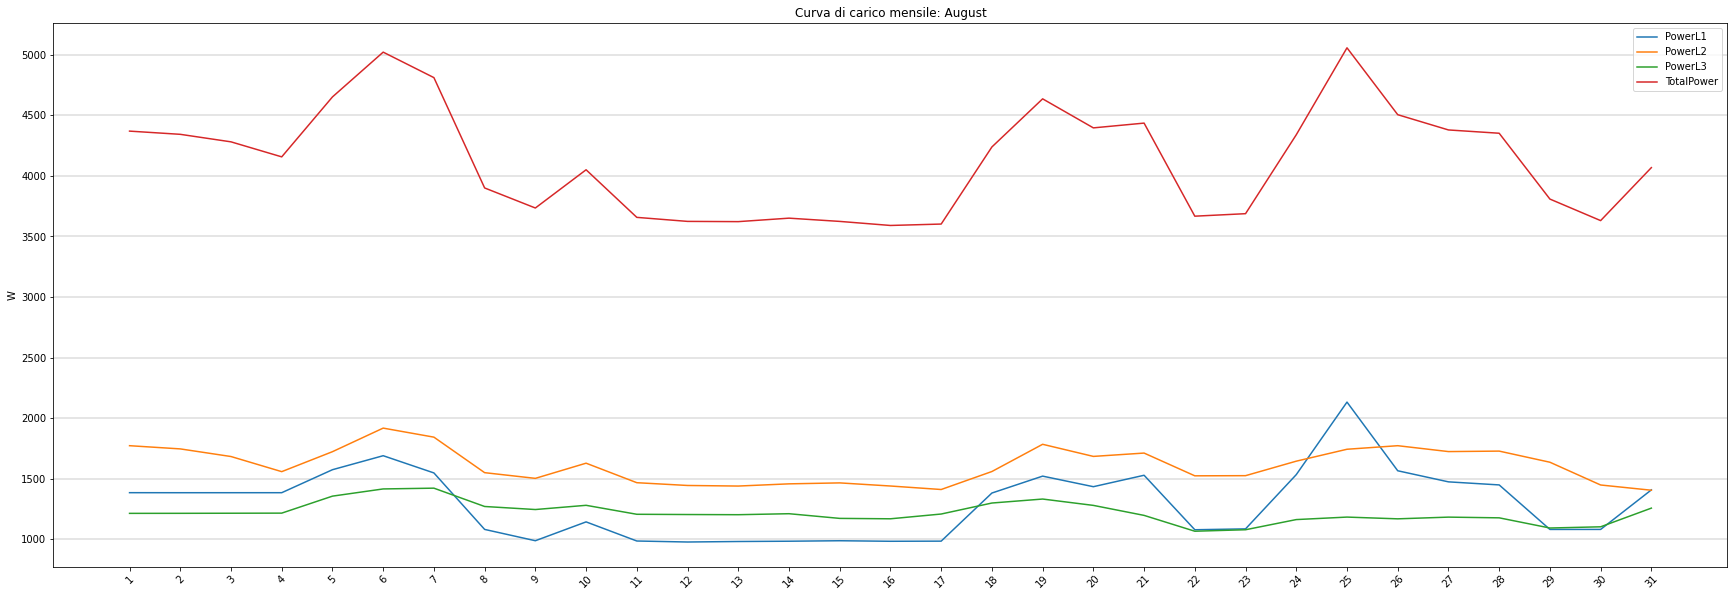

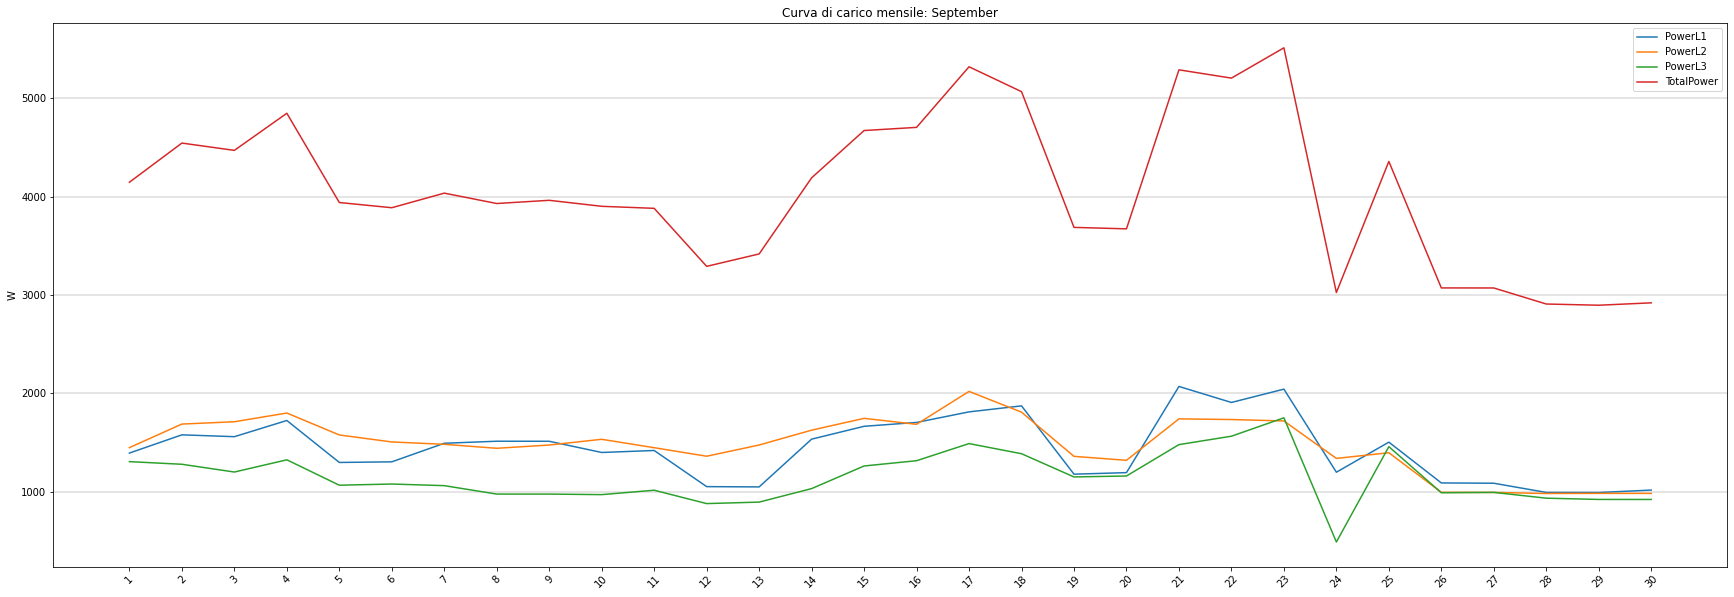

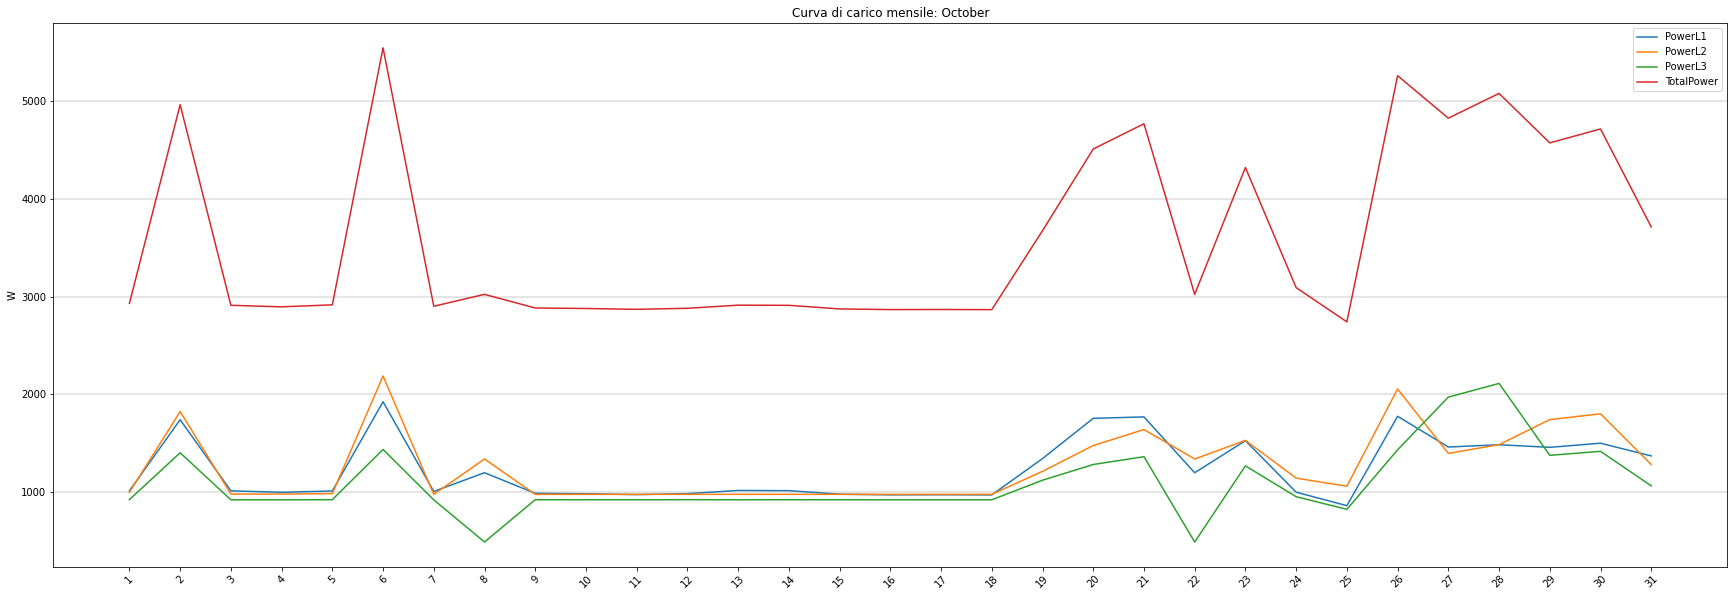

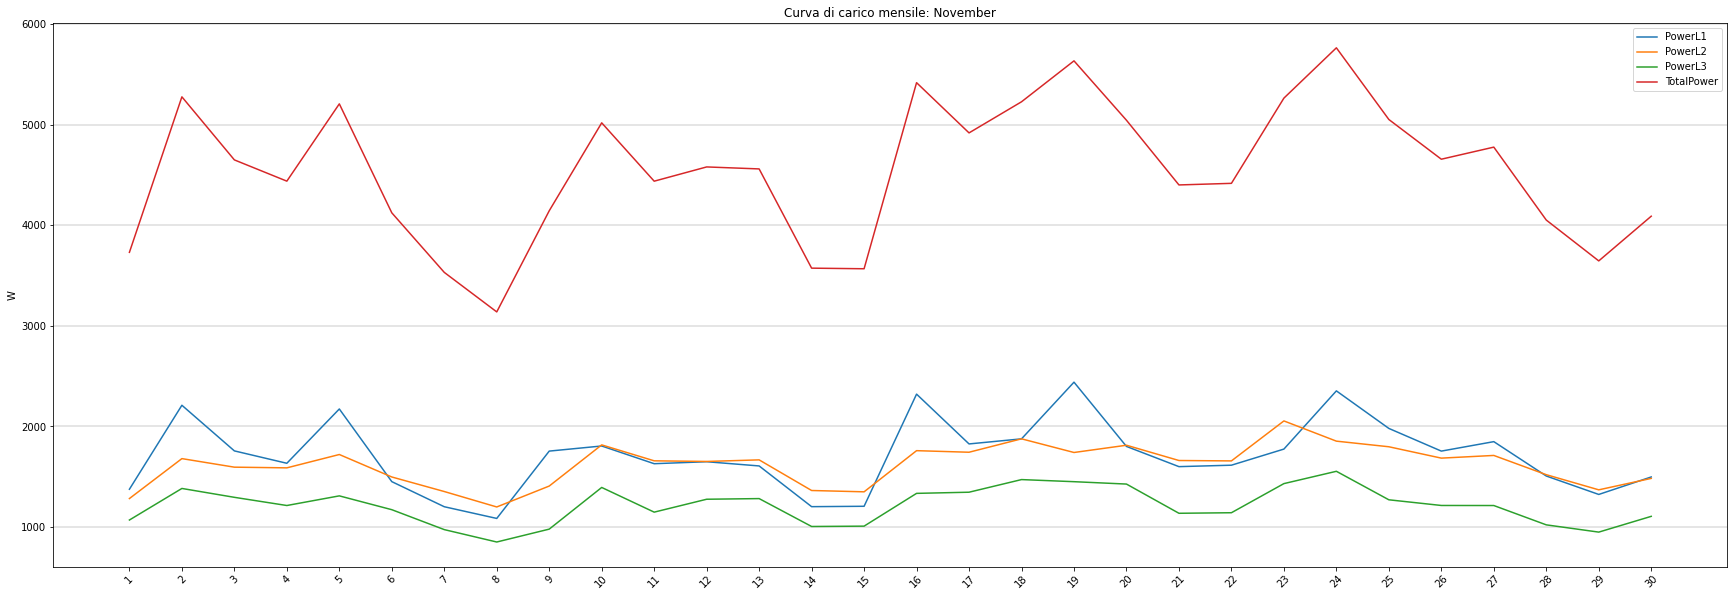

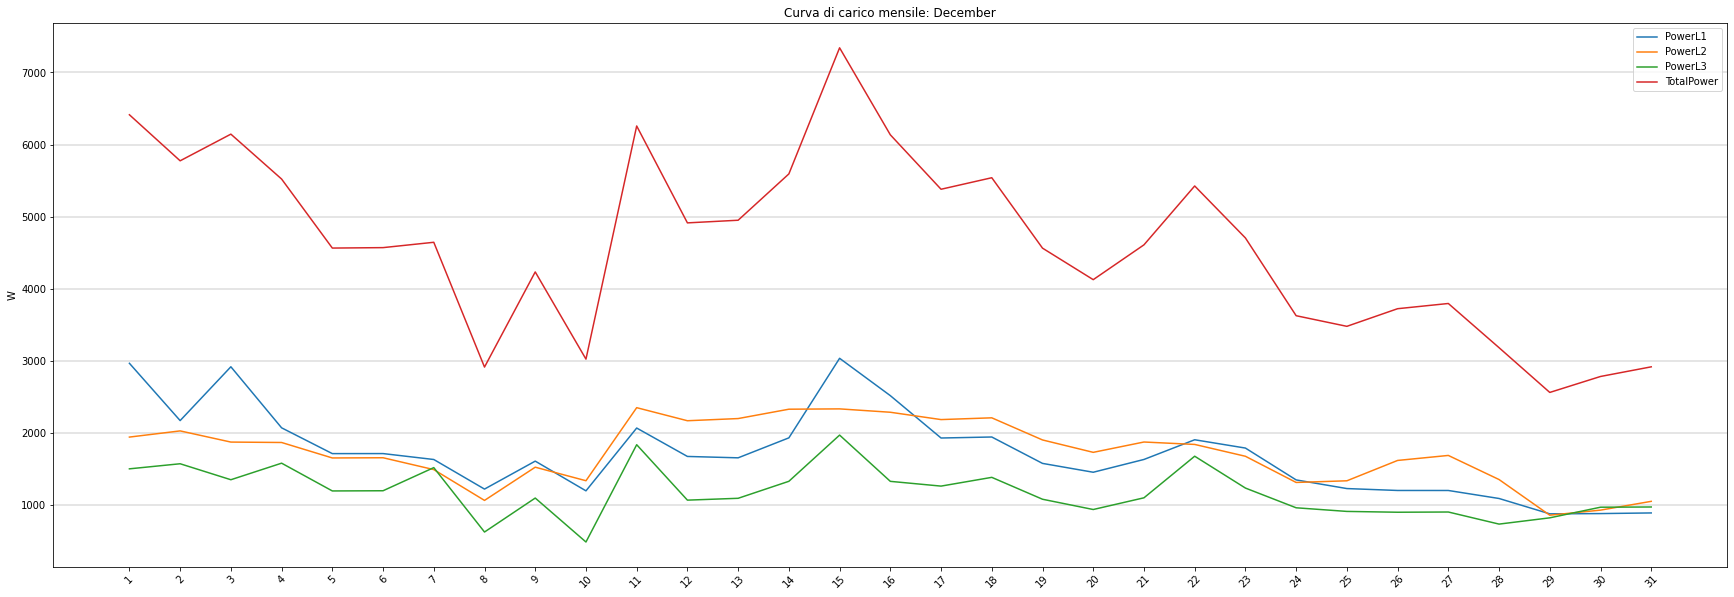

In [14]:
year = 2020
for i in range(1,13):
    start = datetime(year, i, 1, 0, 0, 0)
    end = datetime(year, i, calendar.monthrange(year, i)[1], 23, 59, 59)
    title = "Curva di carico mensile: " + calendar.month_name[i]
    ylabel = "W"
    dim = (30,10)
    c = "#000000"
    plot_multiple_load_distribution(df, start, end, fields_sum, c, title, ylabel, dim, plot_path)